# Import Libraries

In [ ]:
# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# libraries for save the model
import pickle

# Data Loading

In [ ]:
HPC_df= pd.read_csv("sample_data/household_power_consumption.csv",na_values="?")
HPC_df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.880,0.360,239.01,12.0,0.0,0.0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0.0,0.0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.280,239.05,12.0,0.0,0.0,18.0
260638,260638,30/6/2007,23:58:00,2.660,0.290,238.98,11.2,0.0,0.0,18.0


In [ ]:
HPC_df=HPC_df.drop('index',axis=1)

In [ ]:
HPC_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
260635,30/6/2007,23:55:00,2.880,0.360,239.01,12.0,0.0,0.0,18.0
260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0.0,0.0,17.0
260637,30/6/2007,23:57:00,2.882,0.280,239.05,12.0,0.0,0.0,18.0
260638,30/6/2007,23:58:00,2.660,0.290,238.98,11.2,0.0,0.0,18.0


# Dataset Information

In [ ]:
HPC_df.shape

(260640, 9)

In [ ]:
Columns=HPC_df.columns
Columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
HPC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   260640 non-null  object 
 1   Time                   260640 non-null  object 
 2   Global_active_power    256869 non-null  float64
 3   Global_reactive_power  256869 non-null  float64
 4   Voltage                256869 non-null  float64
 5   Global_intensity       256869 non-null  float64
 6   Sub_metering_1         256869 non-null  float64
 7   Sub_metering_2         256869 non-null  float64
 8   Sub_metering_3         256869 non-null  float64
dtypes: float64(7), object(2)
memory usage: 17.9+ MB


In [ ]:
HPC_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


#Duplicates

In [ ]:
# Get count duplicates for each unique row
dup = HPC_df.groupby(HPC_df.columns.tolist(), as_index=False).size()
print(dup)

          Date     Time  Global_active_power  Global_reactive_power  Voltage  \
0       1/1/07  0:00:00                2.580                  0.136   241.97   
1       1/1/07  0:01:00                2.552                  0.100   241.75   
2       1/1/07  0:02:00                2.550                  0.100   241.64   
3       1/1/07  0:03:00                2.550                  0.100   241.71   
4       1/1/07  0:04:00                2.554                  0.100   241.98   
...        ...      ...                  ...                    ...      ...   
256864  9/6/07  9:55:00                1.080                  0.212   237.87   
256865  9/6/07  9:56:00                0.456                  0.194   237.69   
256866  9/6/07  9:57:00                0.460                  0.198   238.64   
256867  9/6/07  9:58:00                0.456                  0.198   238.67   
256868  9/6/07  9:59:00                0.632                  0.194   238.06   

        Global_intensity  Sub_metering_

In [ ]:
# Get the count of duplicates rows
print("Number of duplicates:", HPC_df.duplicated().sum())

Number of duplicates: 0


# Null Values

In [ ]:
# Missing Values/Null Values Count
Null_values = HPC_df.isnull().sum()
Null_values

Date                        0
Time                        0
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
dtype: int64

<Figure size 1000x1000 with 0 Axes>

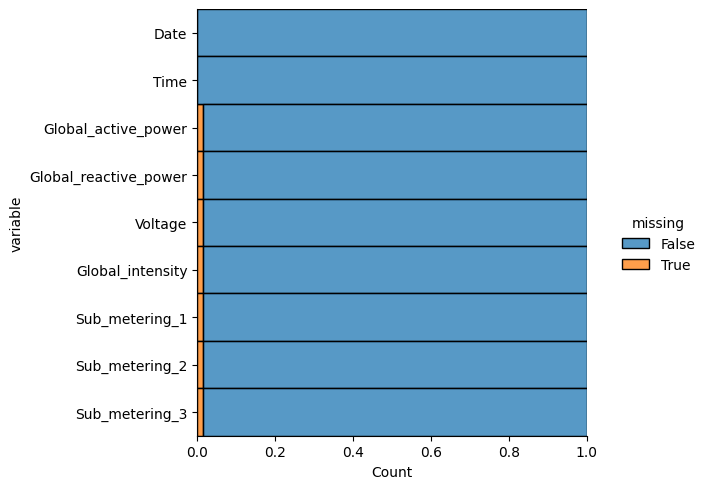

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,10))
sns.displot(
    data=HPC_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

# Unique Values

In [ ]:
# Check Unique Values for each variable
for i in HPC_df.columns.tolist():
  print("No. of unique values in ",i,"is",HPC_df[i].nunique())

No. of unique values in  Date is 181
No. of unique values in  Time is 1440
No. of unique values in  Global_active_power is 3584
No. of unique values in  Global_reactive_power is 413
No. of unique values in  Voltage is 2275
No. of unique values in  Global_intensity is 199
No. of unique values in  Sub_metering_1 is 78
No. of unique values in  Sub_metering_2 is 79
No. of unique values in  Sub_metering_3 is 21


# Data Wrangling

In [ ]:
df_energy = HPC_df.copy()
df_energy.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [ ]:
#drop the date and time columns
df_energy.drop(['Date', 'Time'], axis=1, inplace=True)

# Print the updated dataframe
df_energy

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
260635,2.880,0.360,239.01,12.0,0.0,0.0,18.0
260636,2.892,0.358,238.86,12.2,0.0,0.0,17.0
260637,2.882,0.280,239.05,12.0,0.0,0.0,18.0
260638,2.660,0.290,238.98,11.2,0.0,0.0,18.0


In [ ]:
#separate column list for better analysis
power_cols =['Sub_metering_1','Sub_metering_2','Sub_metering_3']

# Data Vizualization

<ipython-input-189-836a9e416a23>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_energy['Global_active_power'], color = 'Blue')


<Axes: xlabel='Global_active_power', ylabel='Density'>

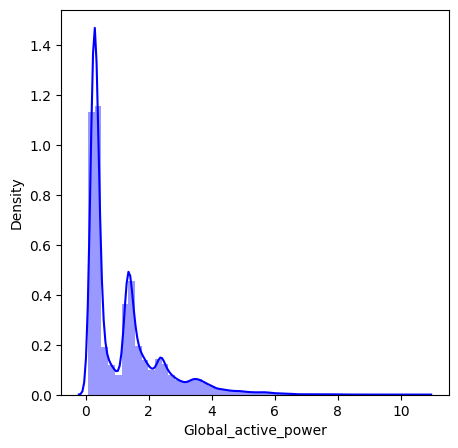

In [ ]:
# Chart - 1
#Dependent varaible "Global_active_power"
plt.figure(figsize=(5,5))
sns.distplot(df_energy['Global_active_power'], color = 'Blue')

<ipython-input-190-48d6d72e345c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df_energy['Global_active_power']),color="y")


<Axes: xlabel='Global_active_power', ylabel='Density'>

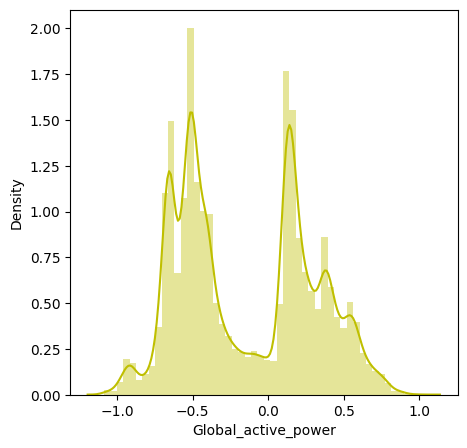

In [ ]:
# Chart - 2
# Dependent variable 'Global_active_power'
plt.figure(figsize=(5,5))
sns.distplot(np.log10(df_energy['Global_active_power']),color="y")

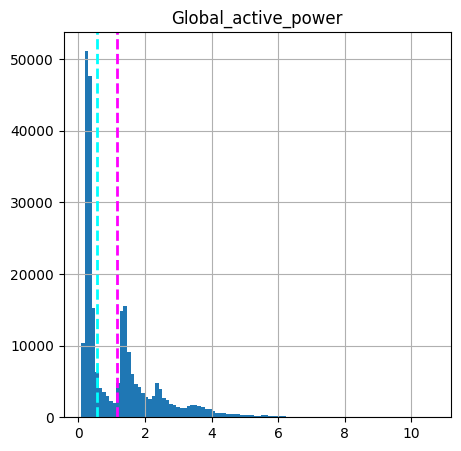

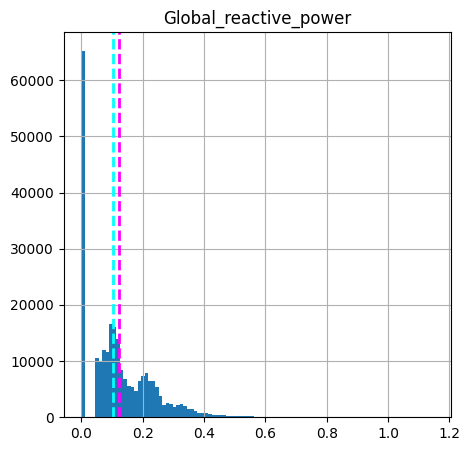

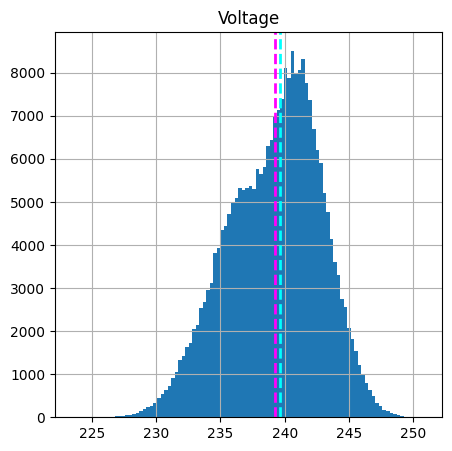

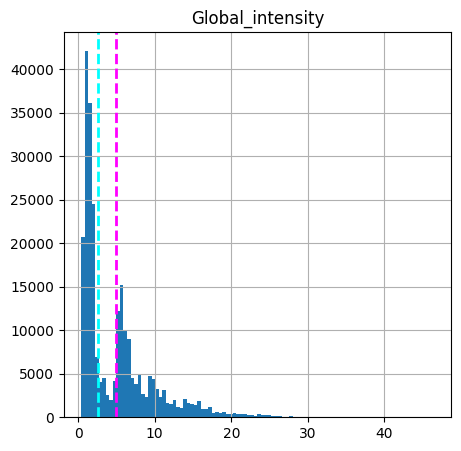

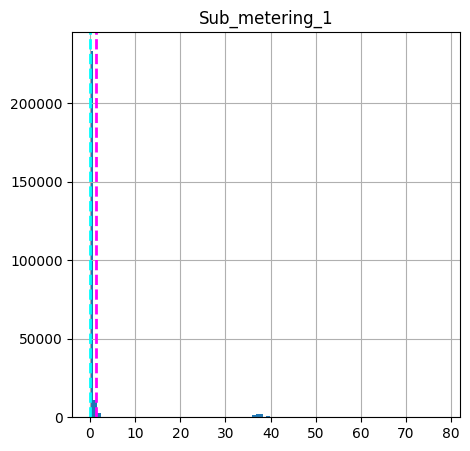

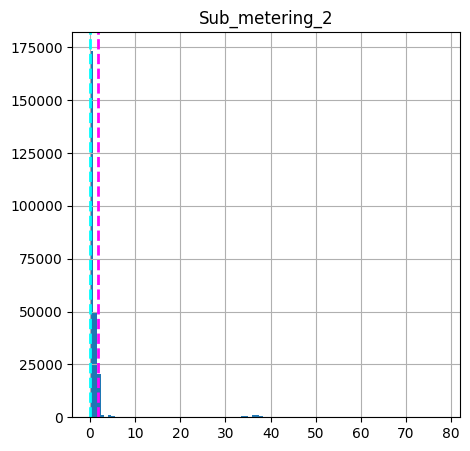

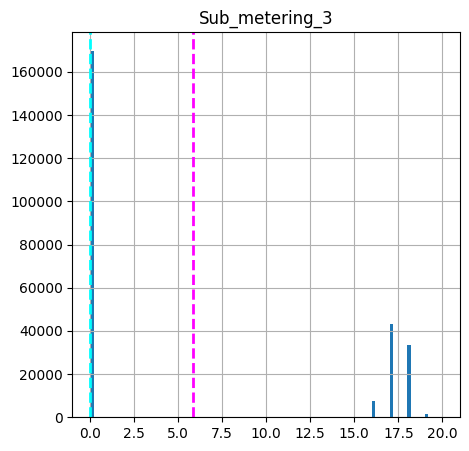

In [ ]:
# Chart - 3
# plot a bar plot for each numerical feature count

for col in df_energy[:]:
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    feature = (df_energy[col])
    feature.hist(bins=100, ax = ax)
    ax.axvline(df_energy[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

<ipython-input-192-e67940b25016>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(df_energy['Global_reactive_power'],ax=ax[0])


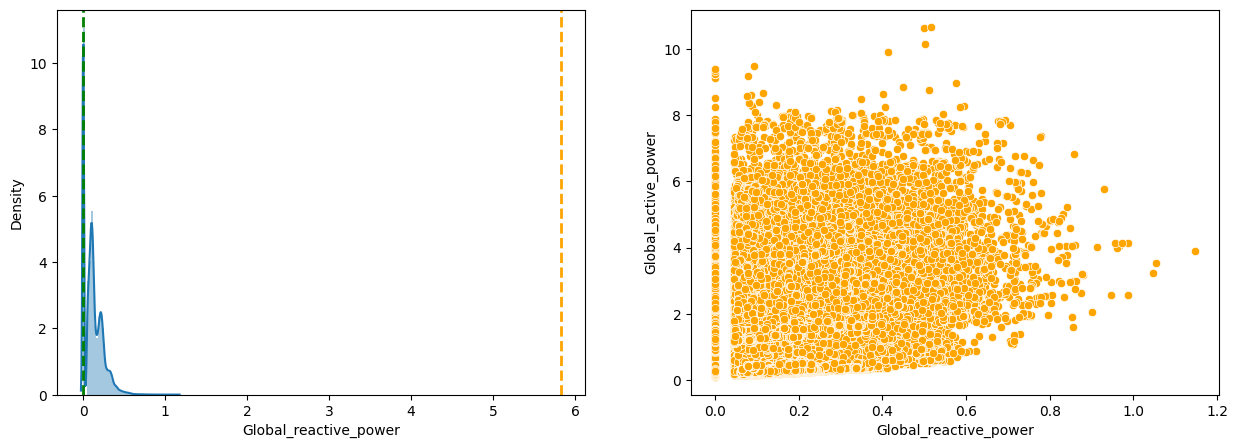

In [ ]:
# Chart - 4
fig,ax=plt.subplots(1,2,figsize=(15,5))

dist=sns.distplot(df_energy['Global_reactive_power'],ax=ax[0])
ax[0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)

scatter=sns.scatterplot(data=df_energy,x='Global_reactive_power',y='Global_active_power',color='orange',ax=ax[1]);


<ipython-input-193-f242ad64309b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(df_energy['Voltage'],ax=ax[0])


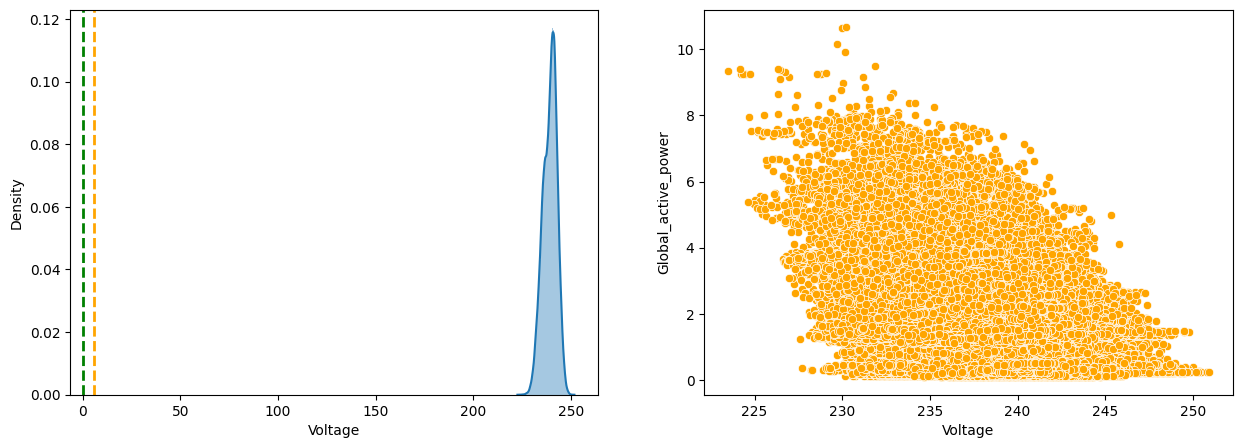

In [ ]:
# Chart - 5
fig,ax=plt.subplots(1,2,figsize=(15,5))

dist=sns.distplot(df_energy['Voltage'],ax=ax[0])
ax[0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)

scatter=sns.scatterplot(data=df_energy,x='Voltage',y='Global_active_power',color='orange',ax=ax[1]);

<ipython-input-194-02f0179af835>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(df_energy['Global_intensity'],ax=ax[0])


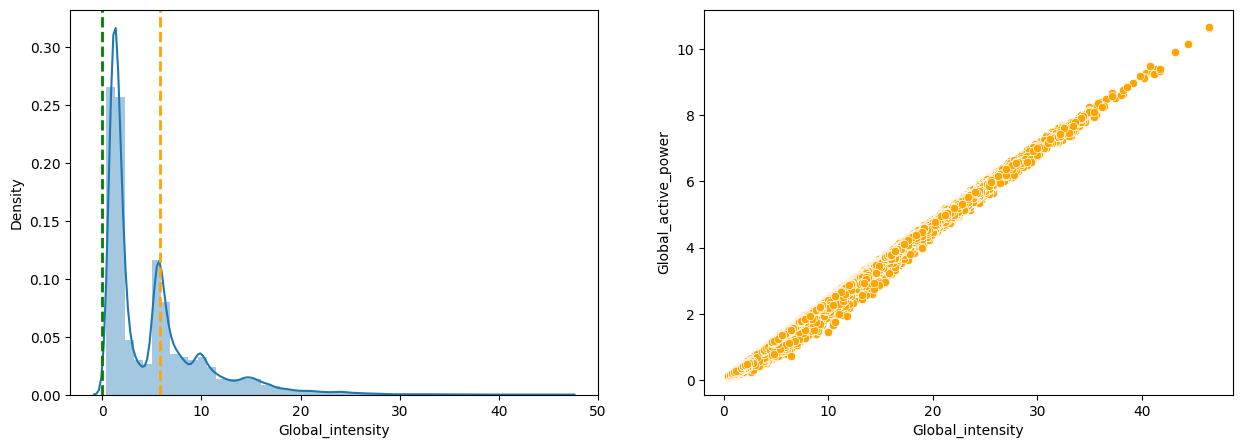

In [ ]:
# Chart - 6
fig,ax=plt.subplots(1,2,figsize=(15,5))

dist=sns.distplot(df_energy['Global_intensity'],ax=ax[0])
ax[0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)

scatter=sns.scatterplot(data=df_energy,x='Global_intensity',y='Global_active_power',color='orange',ax=ax[1]);

<ipython-input-195-7e008c617140>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(df_energy['Sub_metering_1'],ax=ax[0])


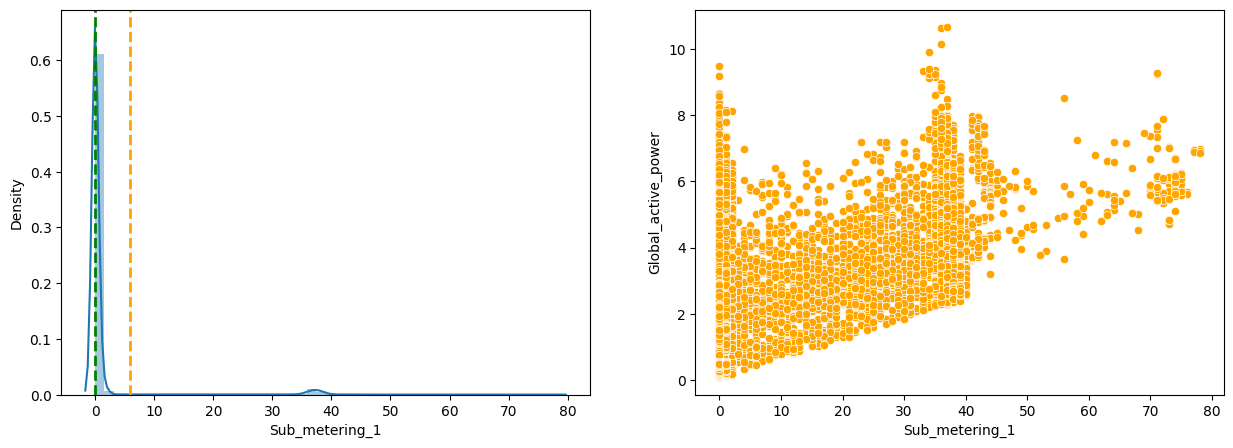

In [ ]:
# Chart - 7
fig,ax=plt.subplots(1,2,figsize=(15,5))

dist=sns.distplot(df_energy['Sub_metering_1'],ax=ax[0])
ax[0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)

scatter=sns.scatterplot(data=df_energy,x='Sub_metering_1',y='Global_active_power',color='orange',ax=ax[1]);

<ipython-input-196-10c52ddd666c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(df_energy['Sub_metering_2'],ax=ax[0])


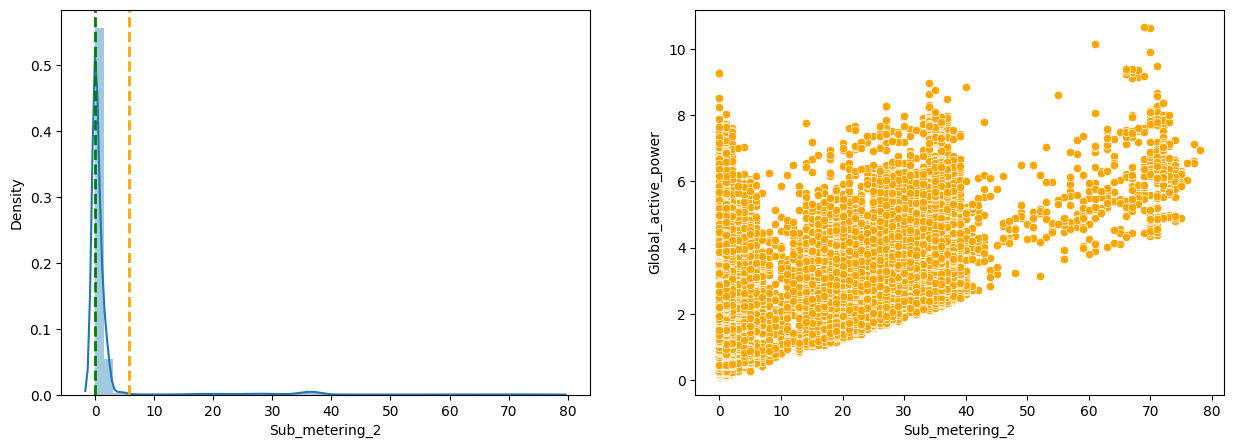

In [ ]:
# Chart - 8
fig,ax=plt.subplots(1,2,figsize=(15,5))

dist=sns.distplot(df_energy['Sub_metering_2'],ax=ax[0])
ax[0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)

scatter=sns.scatterplot(data=df_energy,x='Sub_metering_2',y='Global_active_power',color='orange',ax=ax[1]);

<ipython-input-197-a051816bd87e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(df_energy['Sub_metering_3'],ax=ax[0])


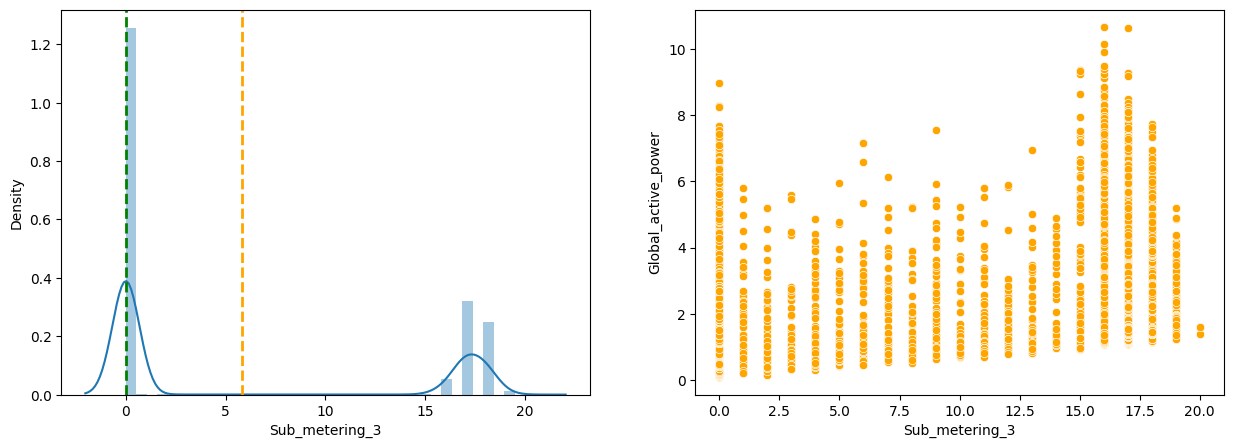

In [ ]:
# Chart - 9
fig,ax=plt.subplots(1,2,figsize=(15,5))

dist=sns.distplot(df_energy['Sub_metering_3'],ax=ax[0])
ax[0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)

scatter=sns.scatterplot(data=df_energy,x='Sub_metering_3',y='Global_active_power',color='orange',ax=ax[1]);

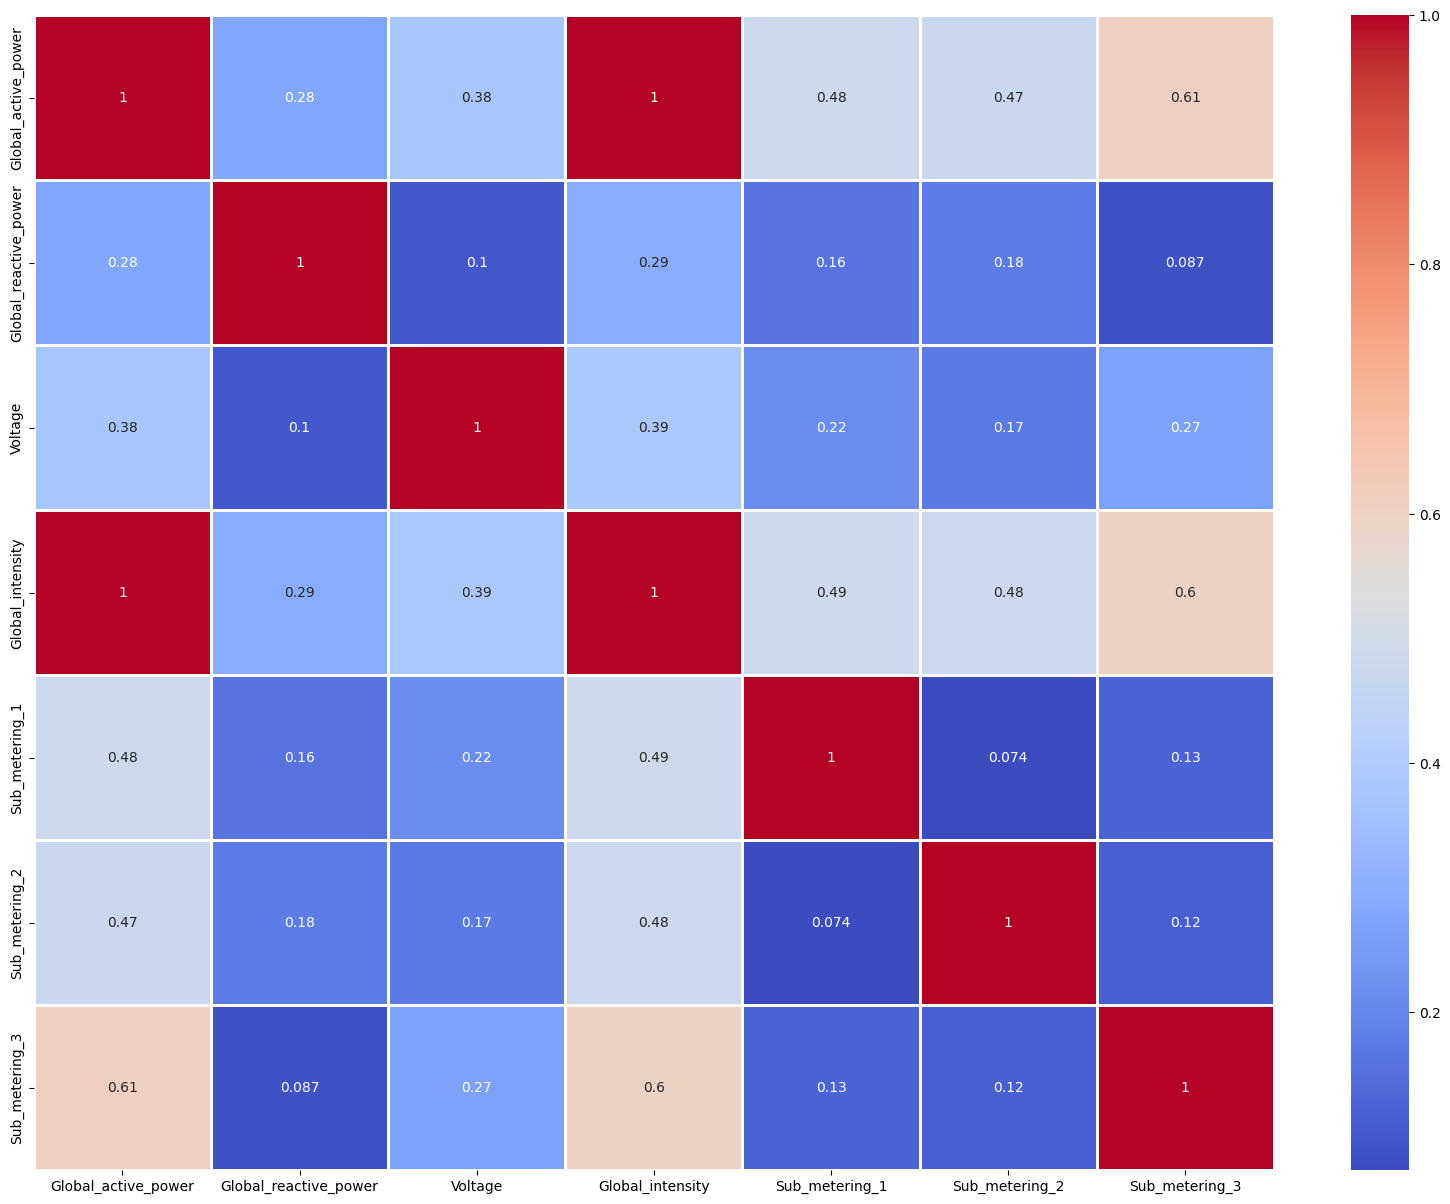

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
correlation = df_energy.corr()
sns.heatmap(abs(correlation) ,annot =True , cmap = 'coolwarm', linewidth = 1)
plt.show()


<Figure size 2500x2500 with 0 Axes>

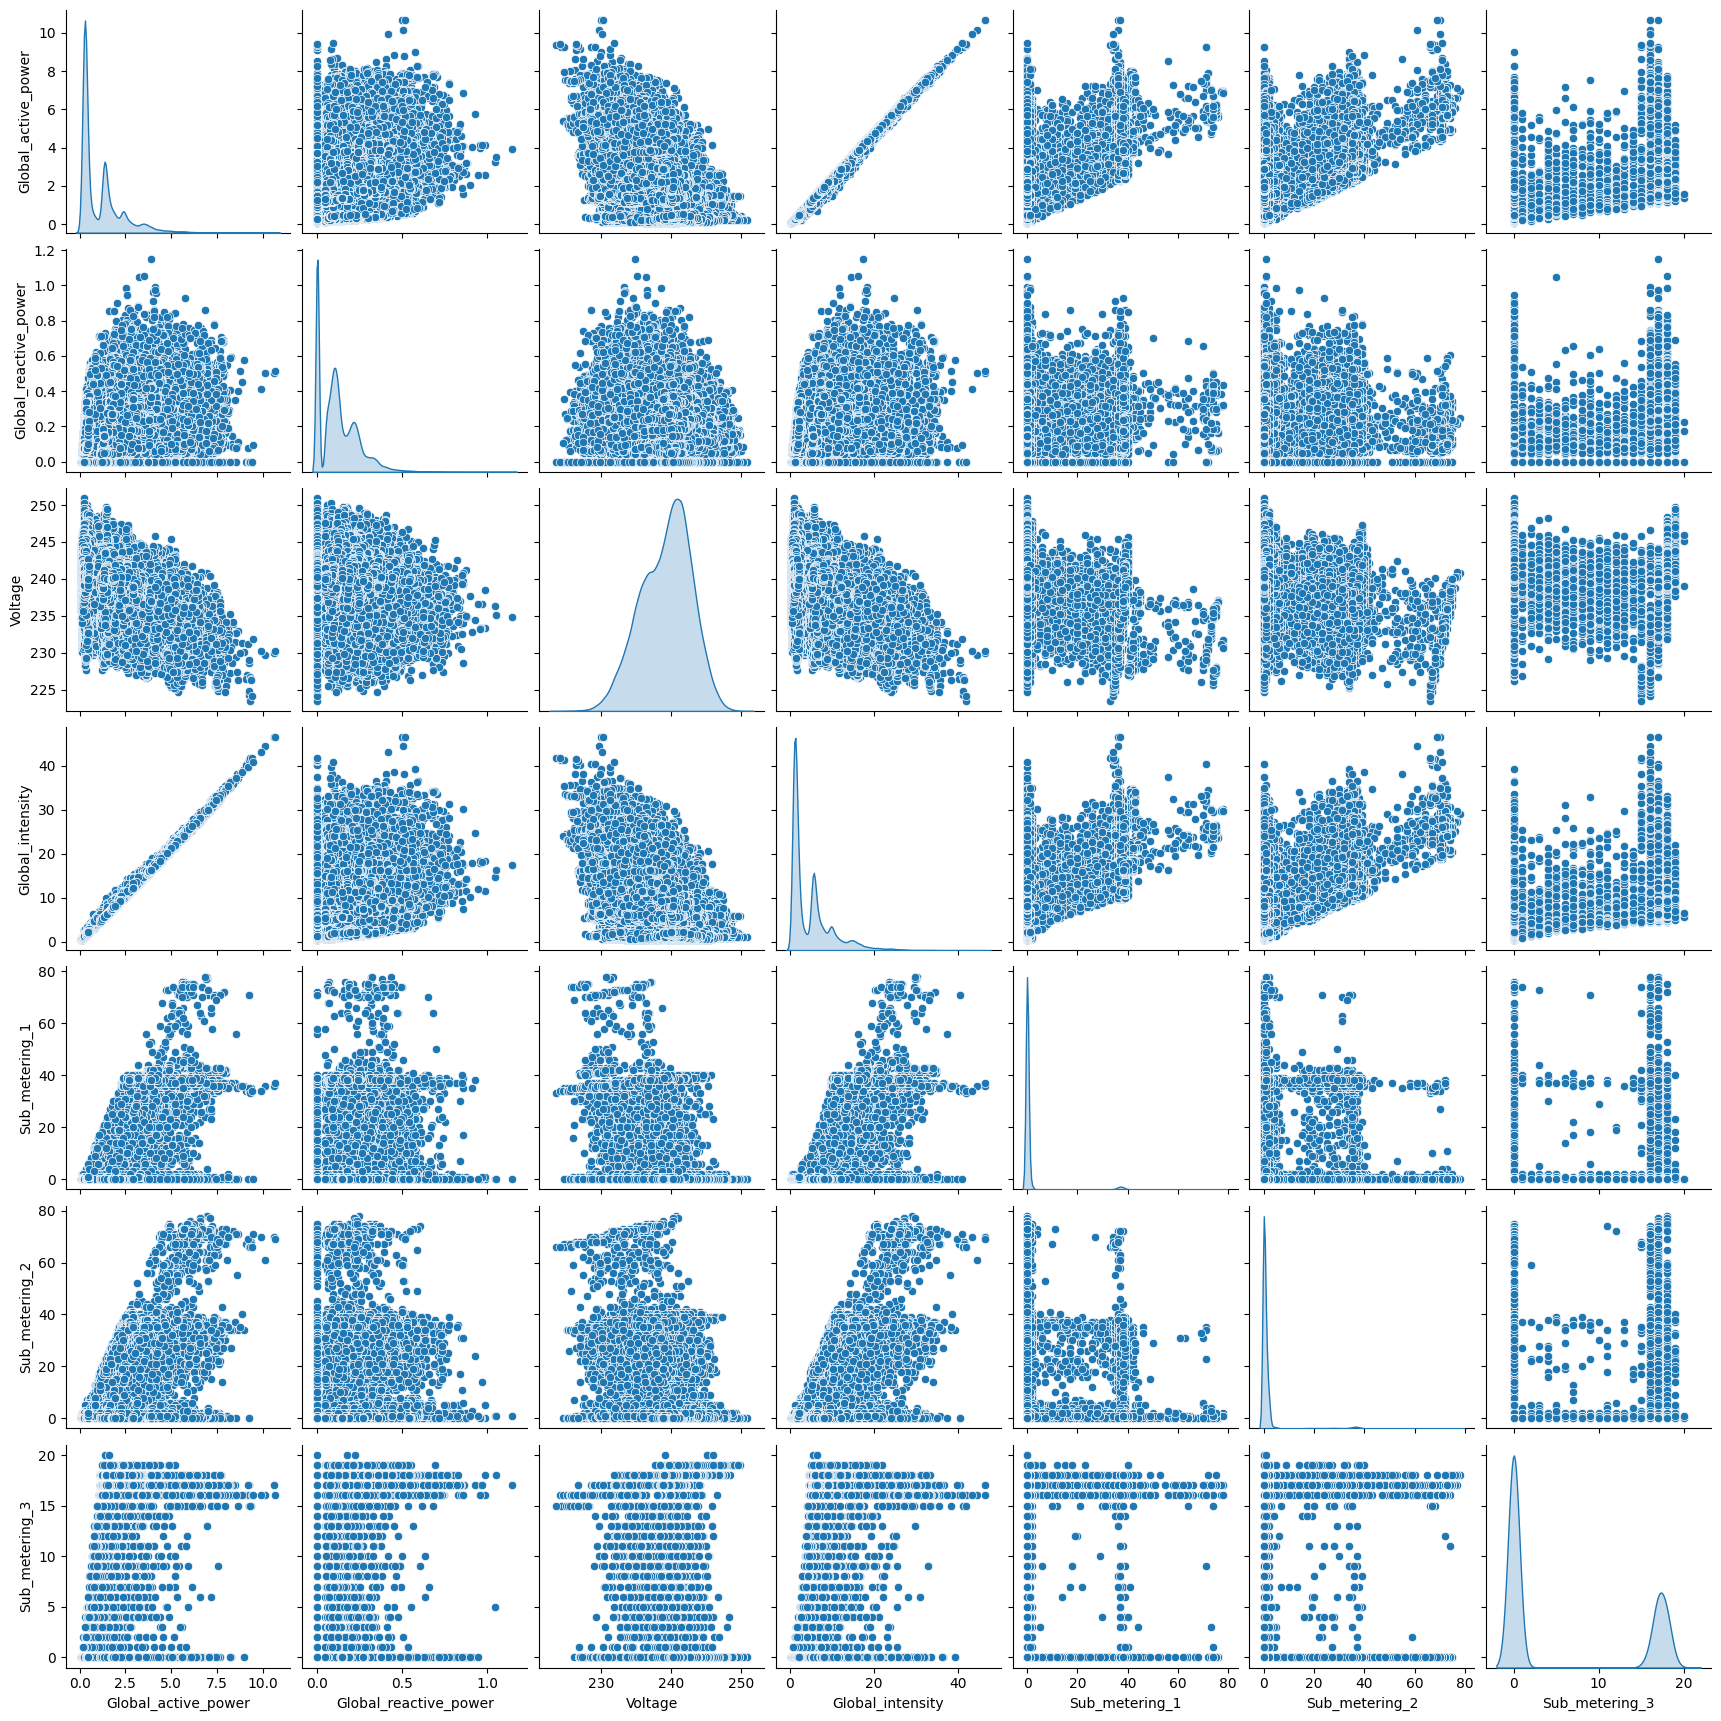

In [ ]:
# Pair Plot visualization
plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[:-3], diag_kind='kde')
plt.show()

# Data Pre-processing

Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
Missing_Values = df_energy.isnull().sum()
Missing_Values

Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
dtype: int64

In [ ]:
df_energy.shape

(260640, 7)

In [ ]:
df_energy = df_energy.dropna()

Missing_Values = df_energy.isnull().sum()
Missing_Values

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df_energy.shape

(256869, 7)

Handling Outliers

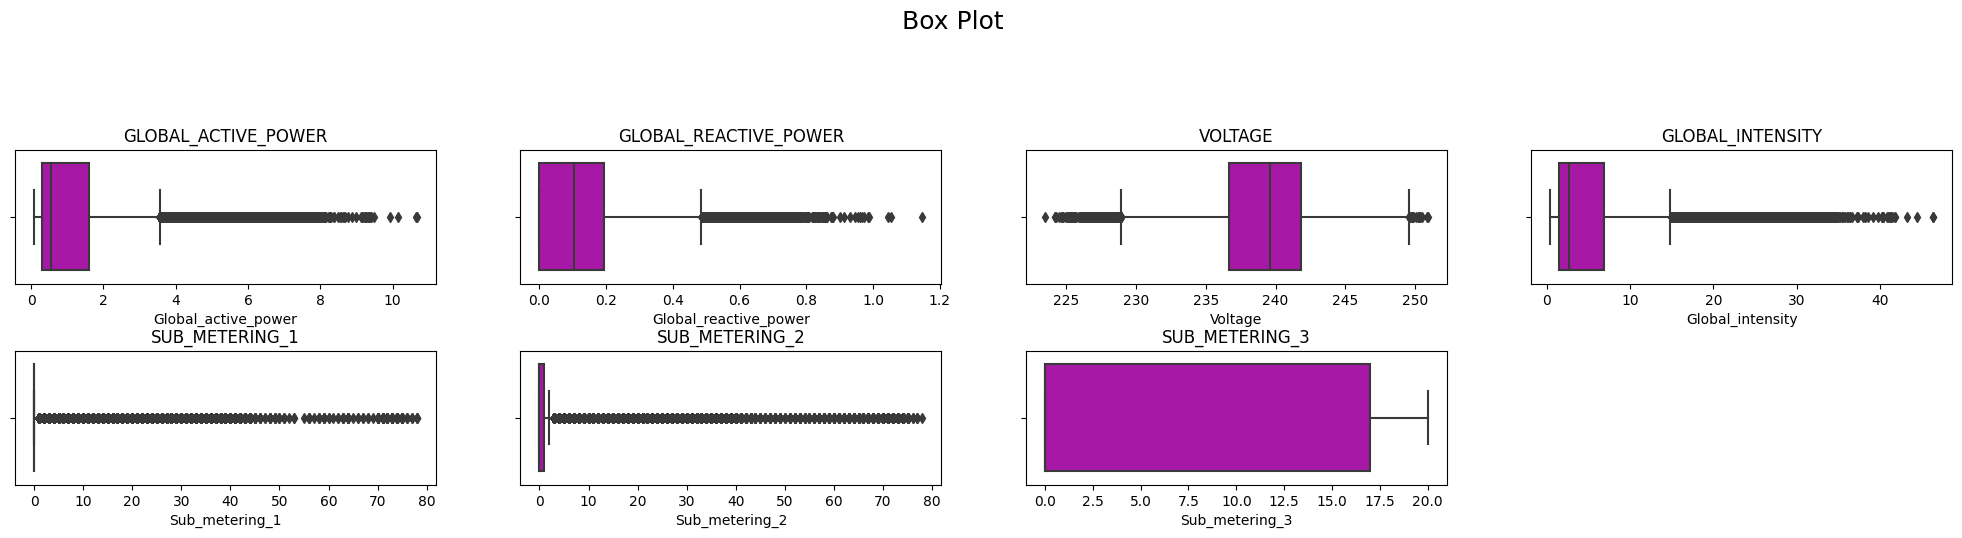

In [ ]:
df= df_energy.copy()
col_list = list(df.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='m', ax = ax)

    ax.set_title(ticker.upper())


In [ ]:
def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (data < lower_bound) | (data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers

outliers_per_column = find_outliers_iqr(df_energy)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))


Number of outliers per column:
Sub_metering_1           23199
Global_intensity         14666
Global_active_power      13664
Sub_metering_2           13424
Global_reactive_power     2210
Voltage                    570
Sub_metering_3               0
dtype: int64


In [ ]:
# Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]

    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

Global_active_power 

Percentiles: 25th=0.296, 75th=1.606, IQR=1.310

lower = -1.669 and upper = 3.571 
 
Identified outliers: 13664
Global_active_power Outliers Removed

-------

Global_reactive_power 

Percentiles: 25th=0.000, 75th=0.194, IQR=0.194

lower = -0.29100000000000004 and upper = 0.48500000000000004 
 
Identified outliers: 2210
Global_reactive_power Outliers Removed

-------

Voltage 

Percentiles: 25th=236.650, 75th=241.810, IQR=5.160

lower = 228.91000000000003 and upper = 249.55 
 
Identified outliers: 570
Voltage Outliers Removed

-------

Global_intensity 

Percentiles: 25th=1.400, 75th=6.800, IQR=5.400

lower = -6.700000000000001 and upper = 14.900000000000002 
 
Identified outliers: 14666
Global_intensity Outliers Removed

-------

Sub_metering_1 

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000

lower = 0.0 and upper = 0.0 
 
Identified outliers: 23199
Sub_metering_1 Outliers Removed

-------

Sub_metering_2 

Percentiles: 25th=0.000, 75th=1.000, IQR=1.000

lower = -

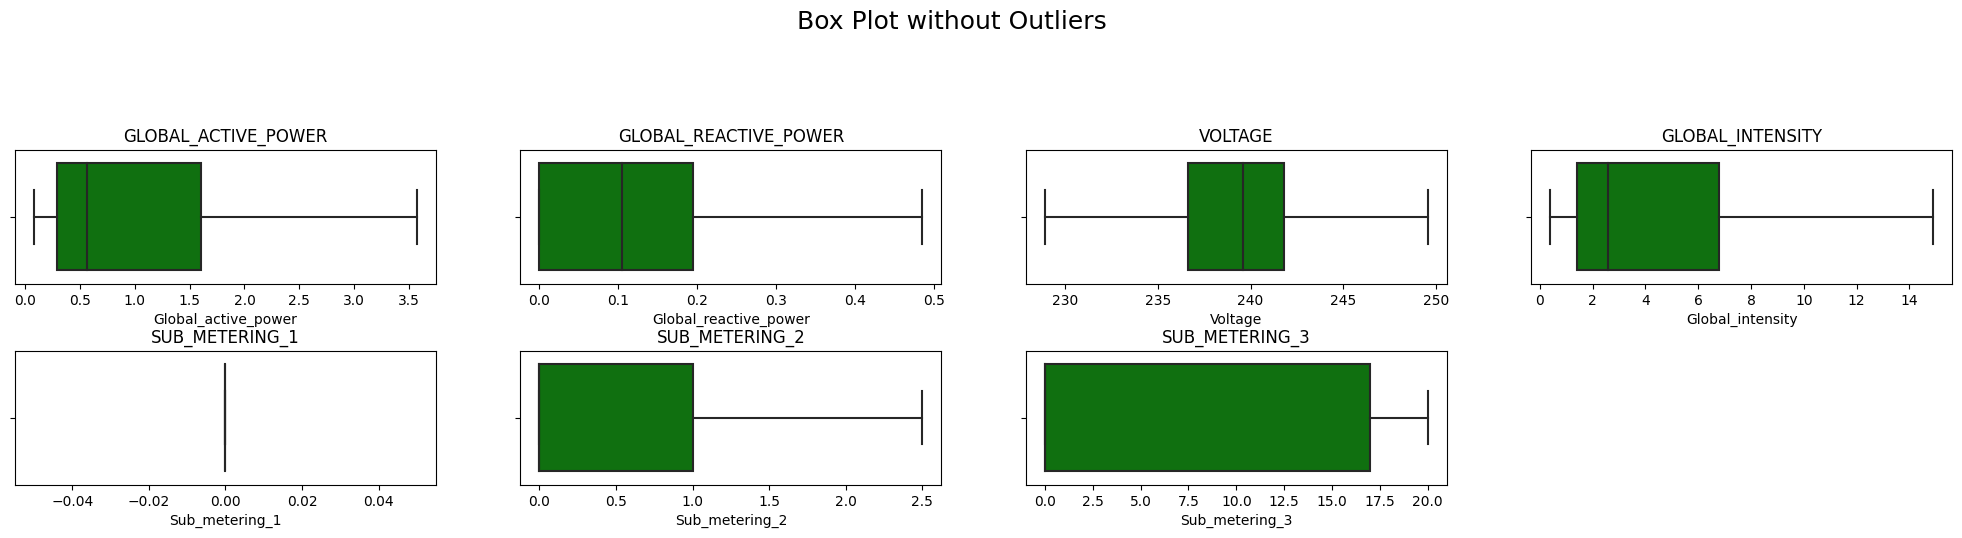

In [ ]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='g' ,ax = ax)

    ax.set_title(ticker.upper())

Feature Manipulation

In [ ]:
# create a column average sub metering based on all sub meterings
df['Average_sub_metering']=df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean(axis=1)

In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Average_sub_metering
0,2.580,0.136,241.97,10.6,0.0,0.0,0.0,0.000000
1,2.552,0.100,241.75,10.4,0.0,0.0,0.0,0.000000
2,2.550,0.100,241.64,10.4,0.0,0.0,0.0,0.000000
3,2.550,0.100,241.71,10.4,0.0,0.0,0.0,0.000000
4,2.554,0.100,241.98,10.4,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
260635,2.880,0.360,239.01,12.0,0.0,0.0,18.0,6.000000
260636,2.892,0.358,238.86,12.2,0.0,0.0,17.0,5.666667
260637,2.882,0.280,239.05,12.0,0.0,0.0,18.0,6.000000
260638,2.660,0.290,238.98,11.2,0.0,0.0,18.0,6.000000


<ipython-input-210-ca34c9c8d01b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-210-ca34c9c8d01b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-210-ca34c9c8d01b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

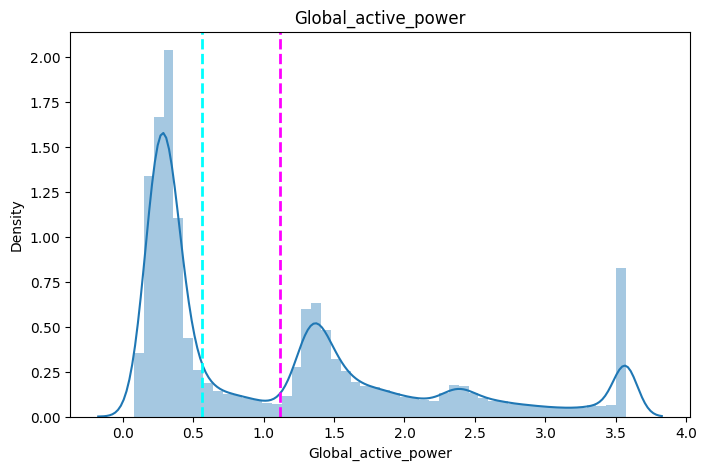

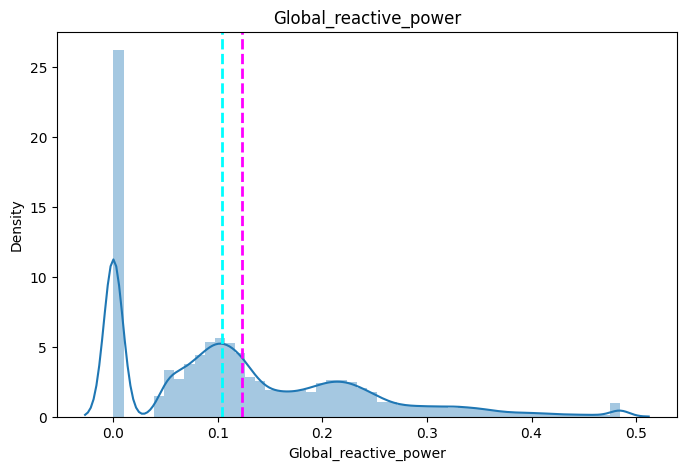

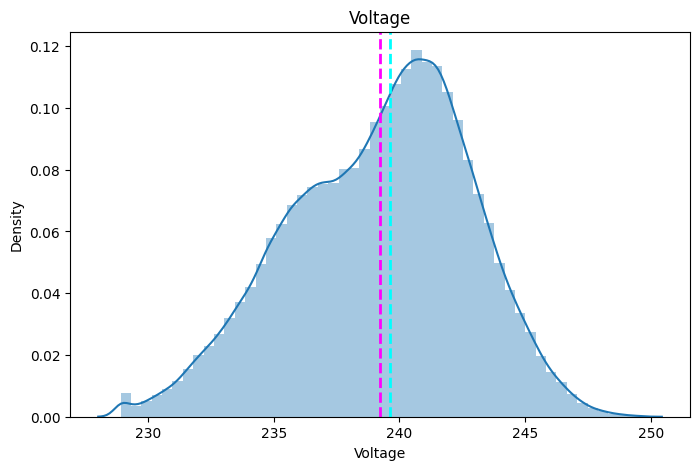

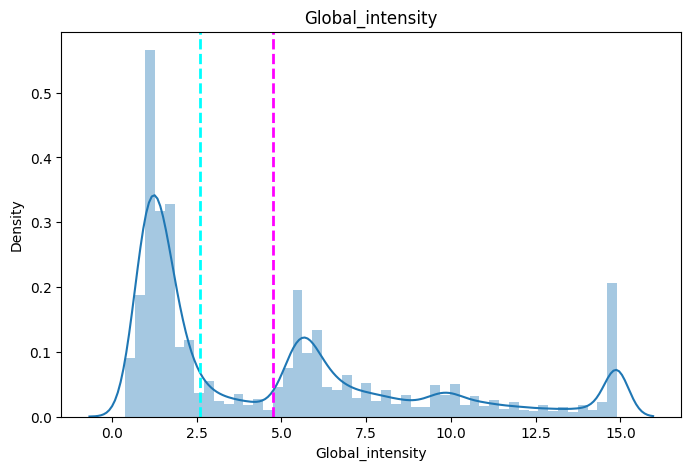

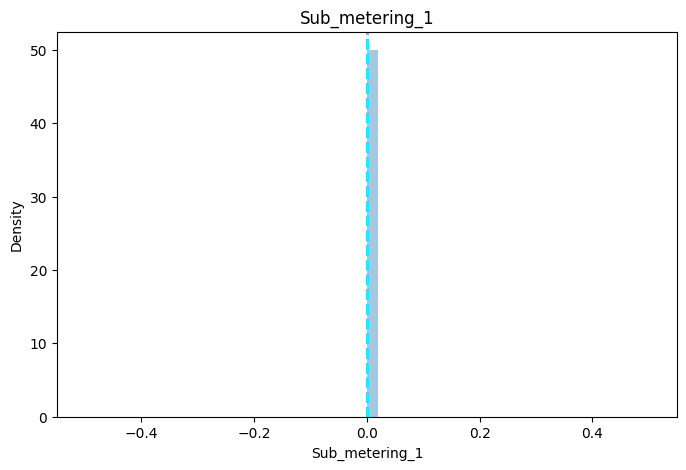

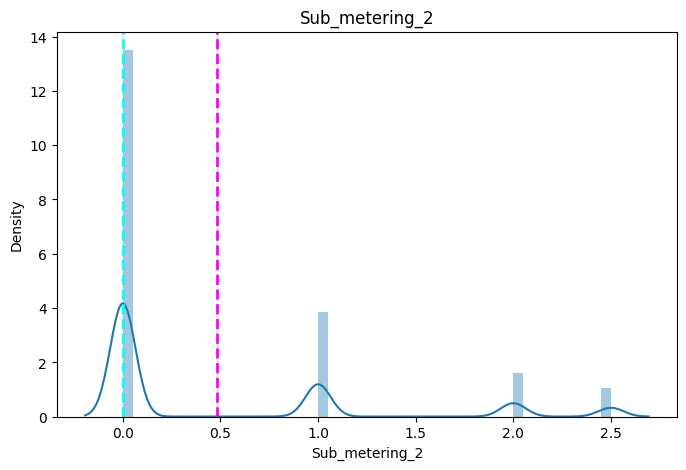

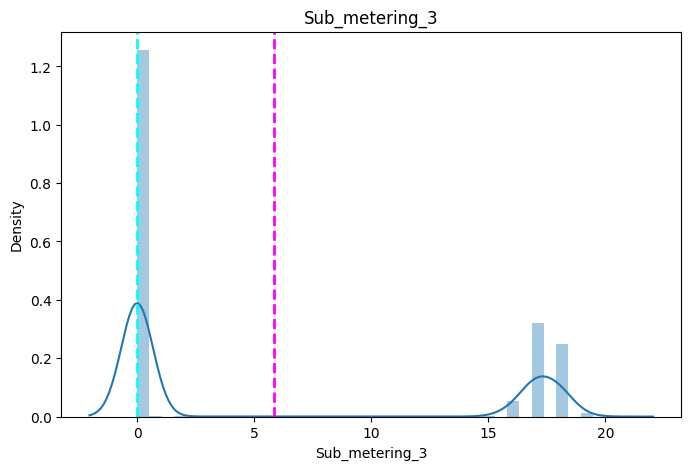

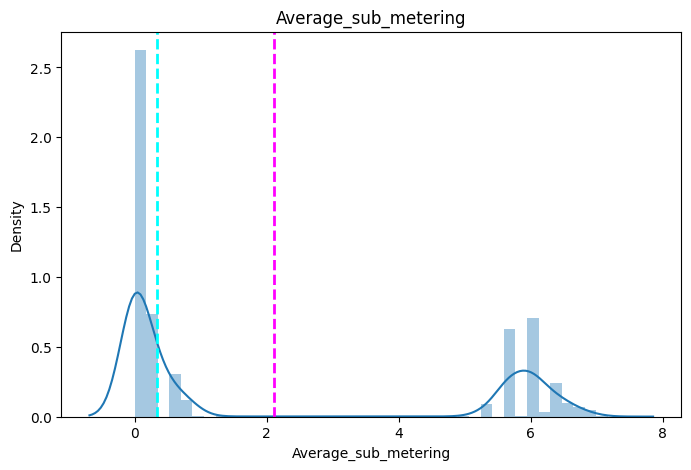

In [ ]:
#check distribution  of all independent features
for col in df.describe().columns:
  fig=plt.figure(figsize=(8,5))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

In [ ]:
df=df.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'], axis=1)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Average_sub_metering
0,2.580,0.136,241.97,10.6,0.000000
1,2.552,0.100,241.75,10.4,0.000000
2,2.550,0.100,241.64,10.4,0.000000
3,2.550,0.100,241.71,10.4,0.000000
4,2.554,0.100,241.98,10.4,0.000000
...,...,...,...,...,...
260635,2.880,0.360,239.01,12.0,6.000000
260636,2.892,0.358,238.86,12.2,5.666667
260637,2.882,0.280,239.05,12.0,6.000000
260638,2.660,0.290,238.98,11.2,6.000000


In [ ]:
x = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']

In [ ]:
x

,Global_reactive_power,Voltage,Global_intensity,Average_sub_metering
0,0.136,241.97,10.6,0.000000
1,0.100,241.75,10.4,0.000000
2,0.100,241.64,10.4,0.000000
3,0.100,241.71,10.4,0.000000
4,0.100,241.98,10.4,0.000000
...,...,...,...,...
260635,0.360,239.01,12.0,6.000000
260636,0.358,238.86,12.2,5.666667
260637,0.280,239.05,12.0,6.000000
260638,0.290,238.98,11.2,6.000000


In [ ]:
y

0         2.580
1         2.552
2         2.550
3         2.550
4         2.554
          ...  
260635    2.880
260636    2.892
260637    2.882
260638    2.660
260639    2.548
Name: Global_active_power, Length: 256869, dtype: float64

In [ ]:
# Split data to train and test
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(205495, 4)
(51374, 4)


In [ ]:
# Scaling the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)
x_scaled=scaler.fit_transform(x)

# Linear Regression Model Implementation

In [ ]:
# Linear regression model
lr = LinearRegression()

# Hyperparameter tunning
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scaled, y_train)

best_lr = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

train_score = best_lr.score(x_train_scaled, y_train)
test_score = best_lr.score(x_test_scaled, y_test)

print("Training R2 Score:", train_score)
print("Testing R2 Score:", test_score)

y_pred = best_lr.predict(x_test_scaled)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2:", r2)

Best Hyperparameters: {'fit_intercept': True}
Training R2 Score: 0.9982201805485349
Testing R2 Score: 0.9981877700104375
MSE: 0.0019343212993062707
RMSE: 0.0439809197187402
R2: 0.9981877700104375


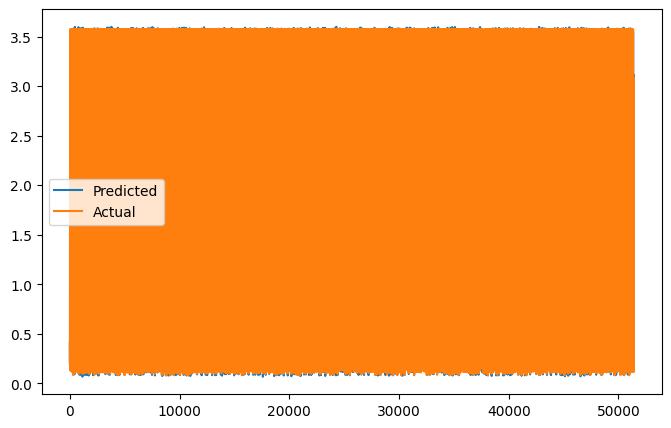

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

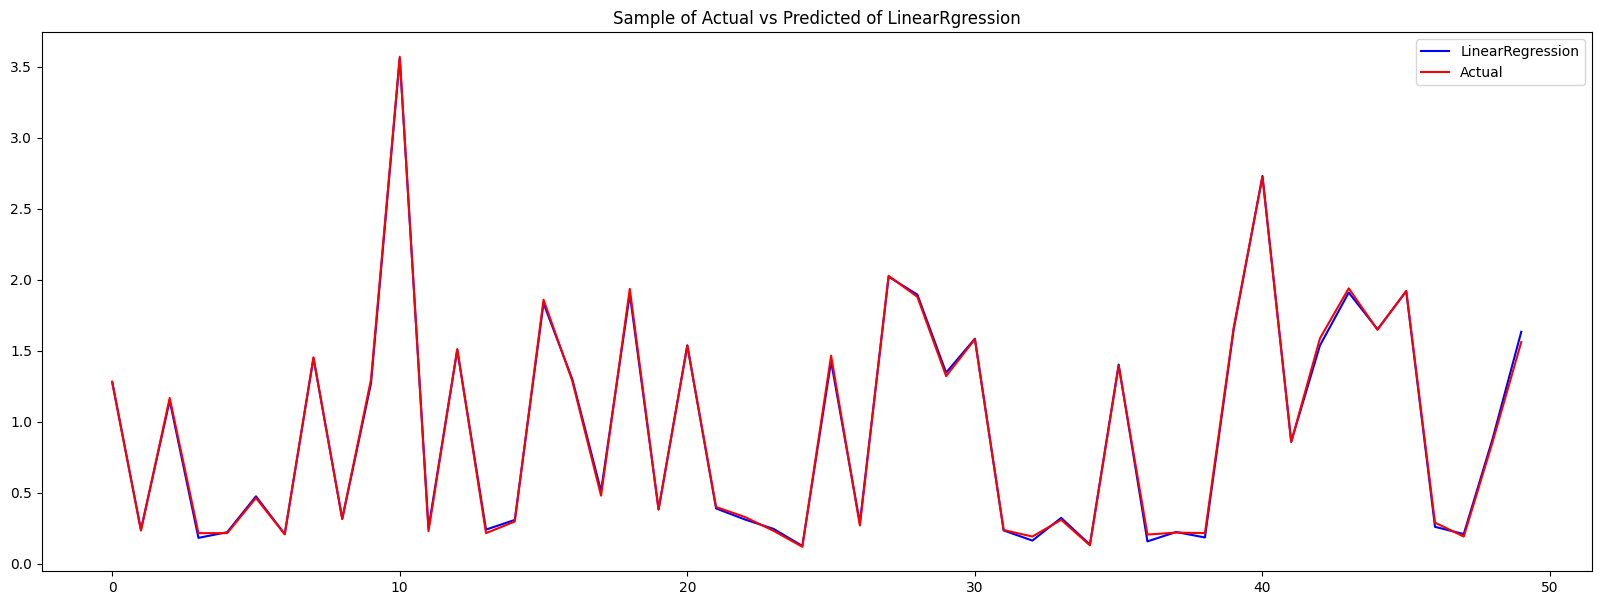

In [ ]:
# Visualizing evaluation Metric Score chart
## Plot the predicted vs actual values
plt.figure(figsize=(20,7))
plt.plot(((y_pred)[500:550]),color='blue')
plt.plot((np.array((y_test)[500:550])),color='red')
plt.legend(["LinearRegression","Actual"])
plt.title("Sample of Actual vs Predicted of LinearRgression" )
plt.show()

# KNN Model Implementation

In [ ]:
# KNN regressor Model
knn = KNeighborsRegressor()

# Hyperparameter tunning
param_grid = {
    'n_neighbors': [ 1, 3, 5, 7, 9, 11 ,13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_knn.fit(x_train_scaled, y_train)

best_knn = grid_search_knn.best_estimator_

print("Best Hyperparameters:", grid_search_knn.best_params_)

train_score_knn = best_knn.score(x_train_scaled, y_train)
test_score_knn = best_knn.score(x_test_scaled, y_test)

print("Training R2 Score:", train_score_knn)
print("Testing R2 Score:", test_score_knn)

y_pred_knn = best_knn.predict(x_test_scaled)

MSE_knn = mean_squared_error(y_test, y_pred_knn)
RMSE_knn = np.sqrt(MSE)
r2_knn = r2_score(y_test, y_pred_knn)

print("MSE:", MSE_knn)
print("RMSE:", RMSE)
print("R2:", r2_knn)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Training R2 Score: 0.9999591380541232
Testing R2 Score: 0.9984792030079075
MSE: 0.001623254239620807
RMSE: 0.0439809197187402
R2: 0.9984792030079075


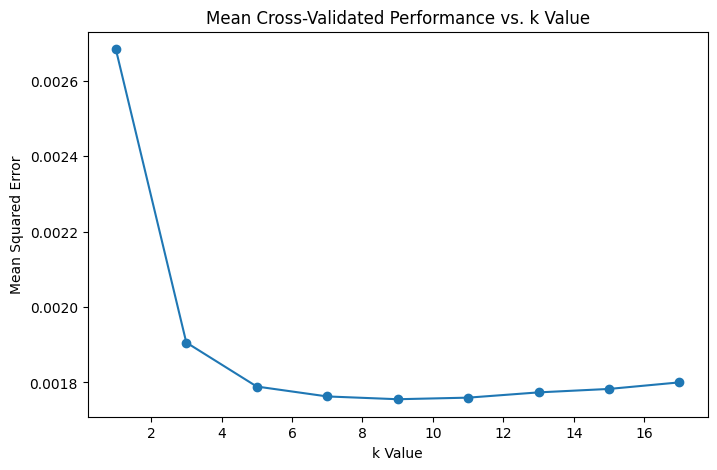

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13 , 15, 17]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    mse = -cross_val_score(knn, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse_values.append(mse)

# Plot the mean cross-validated performance for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o')
plt.title('Mean Cross-Validated Performance vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error')
plt.show()

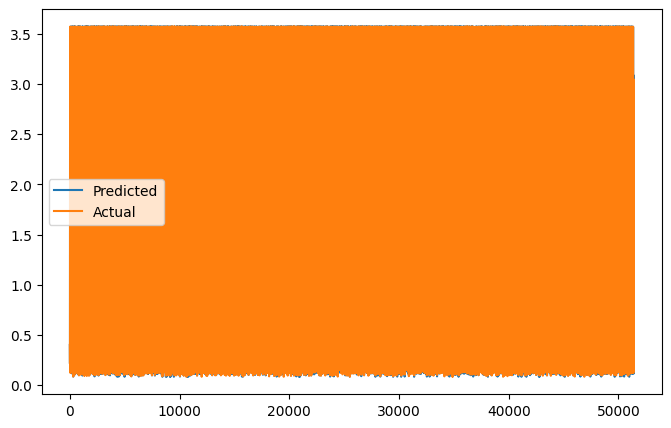

In [ ]:
# Visualize the predicted vs actual values
plt.figure(figsize=(8, 5))
plt.plot(np.array(y_test), label="Actual")
plt.plot(y_pred_knn, label="Predicted")
plt.legend(["Predicted", "Actual"])
plt.show()

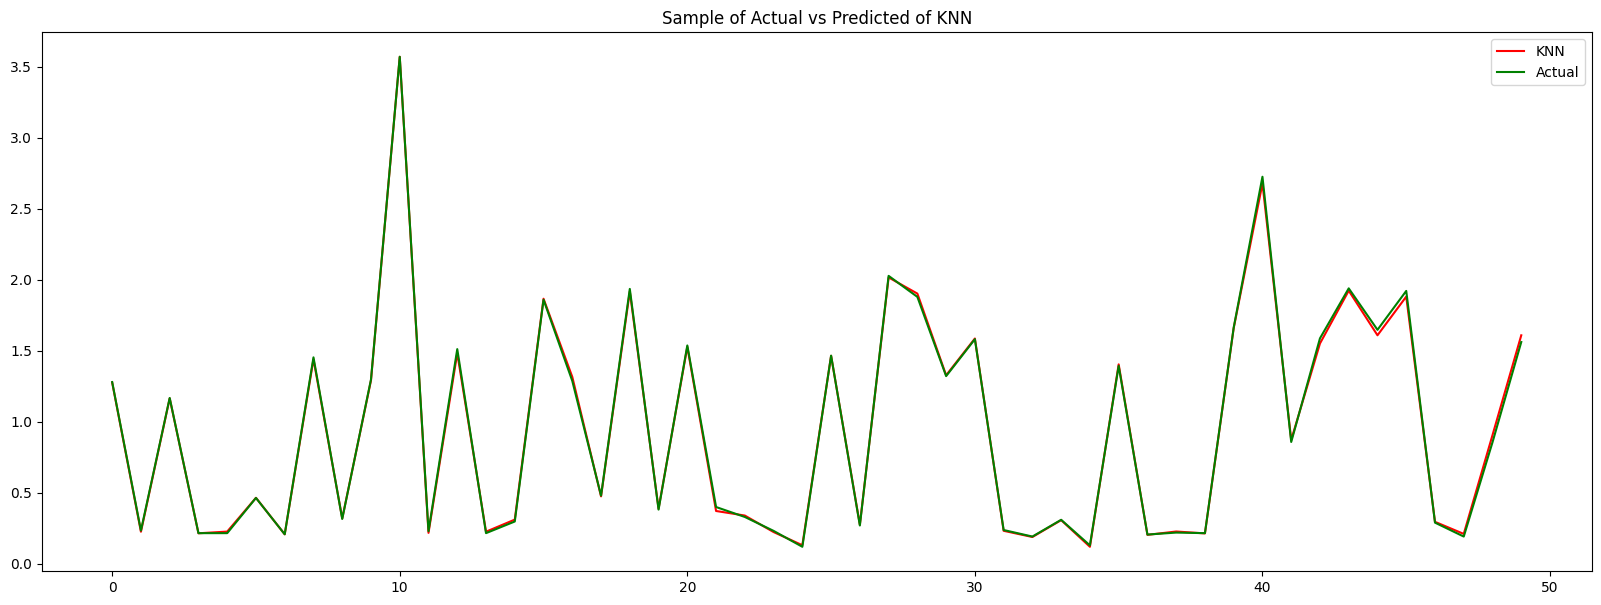

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(20, 7))
plt.plot(((y_pred_knn)[500:550]), color='red')
plt.plot((np.array((y_test)[500:550])), color='green')
plt.legend(["KNN", "Actual"])
plt.title("Sample of Actual vs Predicted of KNN")
plt.show()

# Save the Models

Linear Regression Model

In [ ]:
# Save the best linear regression model to a file using pickle
lr_model_filename = 'gap_predict_lr_model.pkl'
with open(lr_model_filename, 'wb') as lr_model_file:
    pickle.dump(best_lr, lr_model_file)

print(f"Best linear regression model saved to {lr_model_filename}")

Best linear regression model saved to gap_predict_lr_model.pkl


KNN Regression Model

In [ ]:
# Save the best KNN model to a file using pickle
knn_model_filename = 'gap_predict_knn_model.pkl'
with open(knn_model_filename, 'wb') as knn_model_file:
    pickle.dump(best_knn, knn_model_file)

print(f"Best KNN model saved to {knn_model_filename}")

Best KNN model saved to gap_predict_knn_model.pkl


# Load the Models

Linear Regression Model

In [ ]:
# Load the saved linear regression model from file
with open(lr_model_filename, 'rb') as lr_model_file:
    loaded_lr_model = pickle.load(lr_model_file)

KNN Regression Model

In [ ]:
# Load the saved KNN model from file
with open(knn_model_filename, 'rb') as knn_model_file:
    loaded_knn_model = pickle.load(knn_model_file)